# Project: Stable Diffusion with Fine-tuning and ControlNet

**Instructions for Students:**

Please carefully follow these steps to complete and submit your assignment:

1. **Completing the Assignment**: You are required to work on and complete all tasks in the provided assignment. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: If you don't previously have a folder for collecting assignments, you must create a new folder in your Google Drive. This will be a repository for all your completed assignment files, helping you keep your work organized and easy to access.
   
3. **Uploading Completed Assignment**: Upon completion of your assignment, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your assignment Google Drive folder. This is crucial for the submission and evaluation of your assignment.
   
5. **Setting Permission toPublic**: Please make sure your **Google Drive folder is set to public**. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth assignment process for you and the reviewers.

**Description:**

Welcome to your project assignment on Stable Diffusion, where we will study the subtopics Fine-tuning and ControlNet. This project will give you hands-on experience and a deeper understanding of these concepts. You will be assigned the following:

1. **Fine-tuning a Model for Face Recognition**: You are required to perfect a particular model for face recognition. The goal is to understand the general patterns and basic features prevalent in human faces, thereby allowing the model to represent a particular individual's face. For this assignment, we recommend **using your photos as input**. The model must then generate new faces that closely resemble the input.

2. **ControlNet with Canny Edge**: In this task, you will use ControlNet to detect various edges in an image. **You must include photos of the results of the previous fine-tuning process**. This will help the model understand the input shape and generate new images.

3. **ControlNet to Generate Image Using Pose**: Here, you are required to create a new image based on the received pose of the input image. **You must enter a photo of the previous Canny Edge process**. The goal is to generate an image using the input pose.

Remember, the key to mastering these concepts is practice. So, take your time to understand each task, apply your knowledge, and don't hesitate to ask questions if you encounter any difficulties. Good luck!

**Notes:**

Please take note of the following important points while working on this project:

1. **Usage of GPU**: Be sure to **work with a GPU instead of a CPU** for efficient processing. The powerful computation capability of a GPU is necessary for the tasks involved in this project.

2. **Runtime Restart**: It's crucial that you restart the runtime after completing each Task and Part (but not after each step). **To restart the runtime** on Google Colab, simply follow the steps below:

   - Click on the `Runtime` menu at the top of your notebook.
   - Select `Restart runtime...`.
   - In the pop-up window, confirm your action by clicking `Yes`.
   
Please note that you **should not** opt for "Disconnect and delete runtime" – **we need to restart the Runtime, not delete it**.

In [ ]:
# @title #### Student Identity
student_id = "" # @param {type:"string"}
name = "Nur Ikhsan Wibowo" # @param {type:"string"}
drive_link = ""  # @param {type:"string"}
assignment_id = "00_stable_diffusion_project"

## Installation and Import `rggrader` Package

In [ ]:
%pip install -q rggrader
from rggrader import submit_image
from rggrader import submit

## Task 1: Fine-tuning a Model for Face Recognition

Welcome to the first task of our project assignment. In this task, we are going to embark on an exciting journey to harness the power of Machine Learning for face recognition. You will go through various stages that encompass understanding, implementing, and visualizing a model's results.

The steps are designed to provide you with hands-on experience to better understand model fine-tuning, and to help you gain practical skills that you can apply to similar tasks in the future.

Here are the steps we will tackle:

1. **Setting Up and Configuring a Face Recognition Model for Fine-Tuning** - We will start by setting up our environment and configuring our model to optimize it for face recognition.

2. **Executing Training** - You will then execute the training process, feel free to fine-tune model parameters to enhance recognition accuracy.

3. **Save and Convert Model State** - Afterward, you'll store your data and convert the model’s state into an easily retrievable file for future use.

4. **Generate and Visualize Images** - Lastly, you will visualize your output, thereby gaining insights into your model's performance.

Remember, each step is important and builds upon the previous one. Take your time to understand each step, and don't hesitate to ask questions if you encounter any difficulties. Let's get started!

Environment Setup

In [ ]:
!apt-get update
!apt-get install cuda-toolkit-11-8
import os
os.environ["LD_LIBRARY_PATH"] += ":" + "/usr/local/cuda-11/lib64"
os.environ["LD_LIBRARY_PATH"] += ":" + "/usr/local/cuda-11.8/lib64"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cuda-toolkit-11-8 is already the newest version (11.8.0-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

from natsort import natsorted
from glob import glob
from PIL import Image
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display
import json
import random
import os
import matplotlib.pyplot as plt
import torch

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.1.0 requires triton==2.1.0; platform_system == "Linux" and platform_machine == "x86_64", but you have triton 2.2.0 which is incompatible.
xformers 0.0.24 requires torch==2.2.0, but you have torch 2.1.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.2.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.2.0 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.2.0 which is incompatible.
torchvision 0

**Step 1: Setting Up and Configuring a Face Recognition Model for Fine-Tuning**

Here's a brief explanation of what you need to do in the first step of this project:

1. **Set Up the Project Environment**: Load the `runwayml/stable-diffusion-v1-5` model and create an output directory (e.g., `/content/stable_diffusion_weights/ditto`) to store the refined model weights.

2. **Prepare the Prompts**: Create instance and class prompts to provide the model with the necessary context for output generation. Specify the directories where the instance and class data are stored for the model to access.

  - **The Instance Prompt**: The instance prompt is a specific descriptor that the model will use to generate an output. This prompt will guide the model to generate an output that aligns with the concept.

  - **The Class Prompt**: The class prompt is a general descriptor that the model will use to understand the broader category of the output. This prompt will guide the model to generate an output that falls within the category.

  Additionally, you will also specify the directories where the instance and class data are stored. These directories will be used by the model to access the necessary data for generating the output.

3. **Organize Your Data**: Create necessary directories and a JSON file to organize your data. Ensure to save the image to the instance data directory specified in the 'concepts_list' for the model to access.

4. **Specify Learning Parameters**: Define certain parameters to guide the model's learning process and influence the output generated.

In [ ]:
# Put your code here:
model_sd = "runwayml/stable-diffusion-v1-5"
output_dir = "stable_diffusion_weights/nur_ikhsan"
!mkdir -p $output_dir
# ---- End of your code ----

# Note: Save the image to the instance data directory specified in the 'concepts_list'

In [ ]:
concepts_list = [
    {
        "instance_prompt": "ikhsan",
        "class_prompt": "photo of a person",
        "instance_data_dir": "/content/data/ikhsan",
        "class_data_dir": "/content/data/person"
    }
]

In [ ]:
import json
import os
import random

for c in concepts_list:
  os.makedirs(c["instance_data_dir"], exist_ok=True)

In [ ]:
with open("concepts_list.json", "w") as f:
  json.dump(concepts_list, f, indent=4)

**Step 2: Executing Training**

In the second step of this project, you are required to execute the training process. This is a crucial step where the model learns from the data and fine-tunes its parameters to generate the desired output.

You will be using the `train_dreambooth.py` script to execute the training process. This script accepts several arguments that specify the parameters for the training process.

> Note:
> The training process will take some time, if you are using Google Colab, be aware that it is meant for interactive use, periodically Google will present a checkbox that you need to checked.

In [ ]:
# Put your code here:
num_imgs = 15
num_class_images = num_imgs * 12
max_num_steps = num_imgs * 100
learning_rate = 1e-6
lr_warmup_steps = int(max_num_steps / num_imgs)
print(num_imgs, num_class_images, max_num_steps, learning_rate, lr_warmup_steps)
# ---- End of your code ----

# Note:
# This process will take approximately 20 minutes to complete. Please wait and don't leave it behind.
# If an error occurs during training, ensure that the images or datasets are in the correct folder.

15 180 1500 1e-06 100


In [ ]:
!python3 train_dreambooth.py \
  --pretrained_model_name_or_path=$model_sd \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --instance_data_dir=$output_dir \
  --output_dir=$output_dir \
  --revision="fp16" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=777 \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=$lr_warmup_steps \
  --num_class_images=$num_class_images \
  --sample_batch_size=4 \
  --max_train_steps=$max_num_steps \
  --save_interval=10000 \
  --save_sample_prompt="ikhsan" \
  --concepts_list="concepts_list.json"

2024-02-29 03:25:59.377082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 03:25:59.377133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 03:25:59.378351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 03:26:00.360515: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you do

**Step 3: Save and Convert Model State**

In the third step of this project, you are required to store the model weights and images from your training process. Use the `glob` function to generate a list of files in your output directory, which is then naturally sorted with the `natsorted` function.

Identify the last file in this list as the location where the model weights are stored. This step is key to preserving your project progress and bringing ease to future model loading.

In [ ]:
# Put your code here:

# stored images and model weights
weights_dir = natsorted(glob(output_dir + os.sep + '*'))[-1]
print('Weights directory: ', weights_dir)

# ---- End of your code ----

Weights directory:  stable_diffusion_weights/nur_ikhsan/1500


In [ ]:
# function to display images in grid
def grid_img(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w*scale), int(h*scale)

  grid = Image.new('RGB', size=(cols*w, rows*h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
      img = img.resize((w,h), Image.ANTIALIAS)
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

<ipython-input-12-1e20c2f25389>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


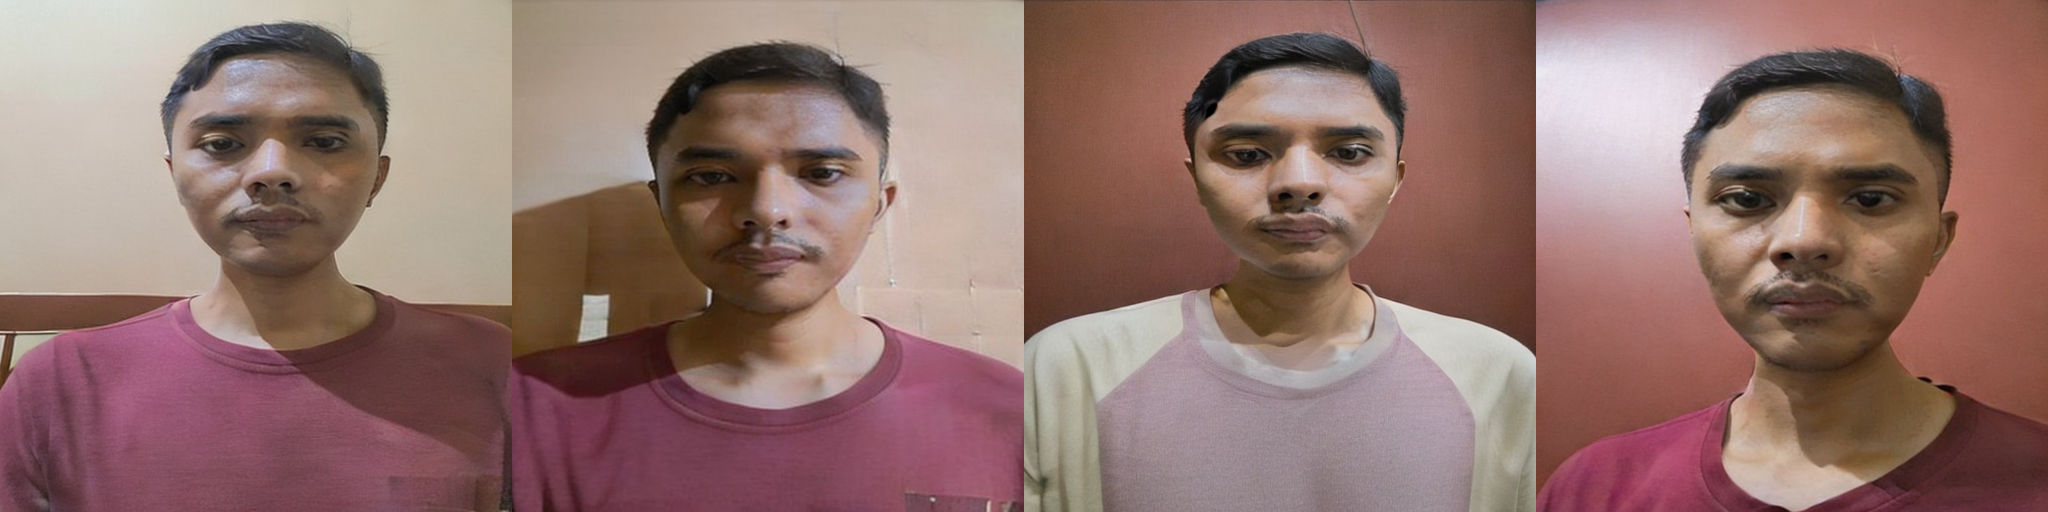

In [ ]:
weights_folder = output_dir
folders = sorted([f for f in os.listdir(weights_folder) if f != "0"], key = lambda x: int(x))

imgs_test = []

for imgs, folder in enumerate(folders):
  folder_path = os.path.join(weights_folder, folder)
  image_folder = os.path.join(folder_path, "samples")
  images = [f for f in os.listdir(image_folder)]

  for i in images:
    img_path = os.path.join(image_folder, i)
    r = Image.open(img_path)
    imgs_test.append(r)

# show images that generated after training
grid_img(imgs_test, rows=1, cols=4, scale=1)

In [ ]:
ckpt_path = weights_dir + "/model.ckpt"

half_arg = "--half"

!python convert_diffusers_to_original_stable_diffusion.py --model_path $weights_dir  --checkpoint_path $ckpt_path $half_arg
print(f"Converted to ckpt and saved in {ckpt_path}")

Reshaping encoder.mid.attn_1.q.weight for SD format
Reshaping encoder.mid.attn_1.k.weight for SD format
Reshaping encoder.mid.attn_1.v.weight for SD format
Reshaping encoder.mid.attn_1.proj_out.weight for SD format
Reshaping decoder.mid.attn_1.q.weight for SD format
Reshaping decoder.mid.attn_1.k.weight for SD format
Reshaping decoder.mid.attn_1.v.weight for SD format
Reshaping decoder.mid.attn_1.proj_out.weight for SD format
Converted to ckpt and saved in stable_diffusion_weights/nur_ikhsan/1500/model.ckpt


**Final Step: Generate and Visualize Images**

In the final step of this project, you are required to create a function to display images in a grid for structured visualization. After that, you required to generate images using the trained model by specifying the path to the model, creating an instance of the `StableDiffusionPipeline` class, and setting the prompts and parameters for image generation. Ensure reproducibility by setting a seed for the random number generator.

Finally, use the pipeline to generate and display the images. This step allows you to assess the model's performance and visualize the final output of your project.

In [ ]:
model_path = weights_dir
print(model_path)

stable_diffusion_weights/nur_ikhsan/1500


In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to('cuda')

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()

pipe.safety_checker = lambda images, clip_input: (images, False)

seed = 555

In [ ]:
# Put your code here:
prompt = ["photo of ikhsan person, cyberpunk, vivid, realistic, 4k ultra hd","anime painting of john person, chill day, by tim okamura, noah bradley, trending on artstation"] # @param {type:"string"}
negative_prompt = negative_prompt = ["bad anatomy, ugly, deformed, desfigured, distorted face, poorly drawn hands, poorly drawn face, poorly drawn feet, blurry, low quality, low definition, lowres, out of frame, out of image, cropped, cut off, signature, watermark" ] * len(prompt) # @param {type:"string"}
imgs = None
# ---- End of your code ----

Seed: 88


  0%|          | 0/75 [00:00<?, ?it/s]

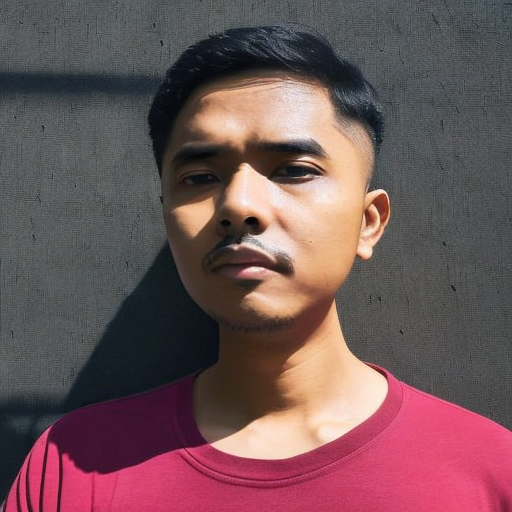

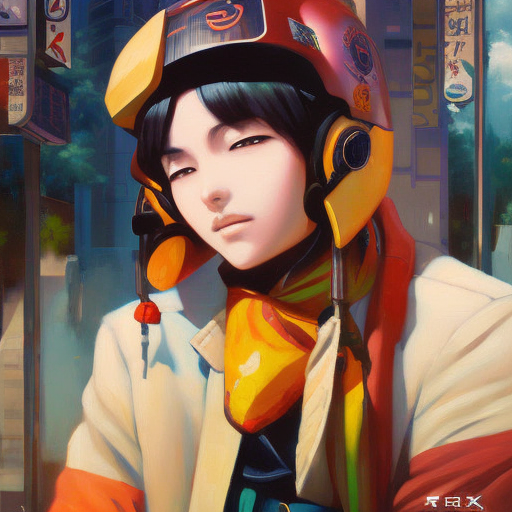

In [ ]:
num_samples = 1
guidance_scale = 8
num_inference_steps = 75
height = 512
width = 512

seed = 88
print("Seed: {}".format(str(seed)))
generator = torch.Generator(device='cuda').manual_seed(seed)

with autocast("cuda"), torch.inference_mode():
    imgs = pipe(
        prompt,
        negative_prompt=negative_prompt,
        height=height, width=width,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator
    ).images

for img in imgs:
    display(img)

**Saving the Results**

In [ ]:
!mkdir fine-tuning-results

In [ ]:
for i, img in enumerate(imgs):
  img.save('fine-tuning-results/result_{}.png'.format(i+1))

**Submit the Result**

In [ ]:
# Submit Method
image_model_question_id = "00_fine_tuning_image_model"
submit_image(student_id, image_model_question_id, r"C:\Users\SoulPerformPC\Documents\Ikhsan_Latihan\project_bootcamp\raw_image_ikhsan\image_train_sd\20240227_212255.jpg") # change '/content/data/image/your-image-model.jpg' to the path of the image you want to upload

image_result_question_id = "01_fine_tuning_image_result"
submit_image(student_id, image_result_question_id, r"C:\Users\SoulPerformPC\Downloads\result_2.png") # change '/content/fine-tuning-results/your-image-result.jpg' to the path of the image you want to upload

'Assignment successfully submitted'

In [ ]:
from google.colab import files
files.download( "/content/stable_diffusion_weights/nur_ikhsan/1500/model.ckpt" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Task 2: Stable Diffusion with ControlNet

Welcome to the second task of our project assignment. This project is designed to deepen your understanding and practical skills in implementing ControlNet in various scenarios.

The project is divided into two main tasks:

- **Part 1**: ControlNet with Canny Edge

- **Part 2**: ControlNet to Generate Image Using Pose

Remember, the key to mastering these concepts is practice. Take your time to understand the tasks and don't hesitate to ask questions if you encounter any difficulties. Good luck!

Environment Setup

In [ ]:
%pip install diffusers==0.14
%pip install -q accelerate transformers
%pip install -q opencv-contrib-python
%pip install -q controlnet_aux


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.4 MB/s eta 0:00:00


In [ ]:
%pip install -U xformers --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler, DEISMultistepScheduler
from PIL import Image
from controlnet_aux import OpenposeDetector
import torch
import cv2
import numpy as np

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. Th

### Part 1: ControlNet with Canny Edge

Welcome to the first part of your project assignment on Stable Diffusion with ControlNet. In this section, we will focus on the application of ControlNet with Canny Edge. This process involves detecting various edges in an image using the ControlNet model.

This part of the project is divided into several steps, each designed to guide you through the process of edge detection using ControlNet.

1. **Initialize Model and Load Input Image**: We'll begin with initializing the ControlNet model and loading our input image. **Use images from those generated from Task 1: Fine-tuning a Model for Face Recognition**.

2. **Detect and Visualize Image Edges**: We will then take the loaded image and apply the Canny Edge detection method, which will allow us to identify key features in the image. We'll follow this up by visualizing these detected edges.

3. **Generating Images**: In the final step, we'll put everything together to generate images using the model, adding a practical hands-on experience to your learning journey.

Remember, each step is crucial in understanding how ControlNet works with Canny Edge. Take your time to understand each step and don't hesitate to ask questions if you encounter any difficulties. Good luck!

**Step 1: Initialize Model and Load Input Image**

In this first step, your task is to load the `lllyasviel/sd-controlnet-canny` ControlNet model using the `ControlNetModel.from_pretrained` method, and set up the `runwayml/stable-diffusion-v1-5` Stable Diffusion ControlNet Pipeline with scheduling and optimization features.

Then, use the `Image.open` method to load your input image produced from the previous fine-tuning process. This step is crucial in setting up your model for edge detection and image generation tasks.

In [ ]:
controlnet_canny_model = 'lllyasviel/sd-controlnet-canny'
control_net_canny = ControlNetModel.from_pretrained(controlnet_canny_model, torch_dtype=torch.float16)

In [ ]:
pipe = StableDiffusionControlNetPipeline.from_pretrained('runwayml/stable-diffusion-v1-5',
                                                         controlnet=control_net_canny,
                                                         torch_dtype=torch.float16)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

C:\Users\SoulPerformPC\anaconda3\envs\pt\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SoulPerformPC\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
text_encoder\model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [ ]:
from diffusers import UniPCMultistepScheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

In [ ]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [ ]:
pipe.enable_model_cpu_offload()

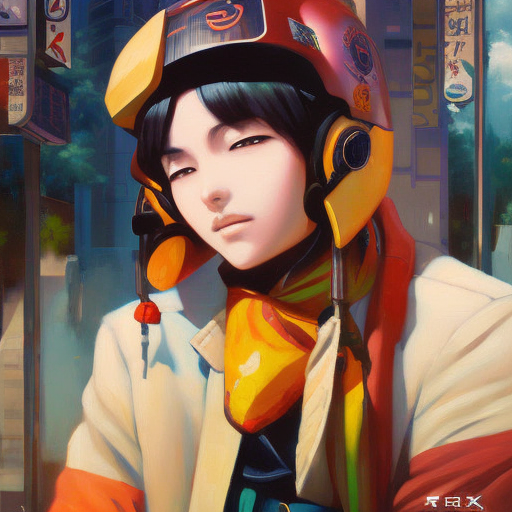

In [ ]:
# Put your code here:
img = Image.open(r"C:\Users\SoulPerformPC\Downloads\result_2.png")
img

# ---- End of your code ----

**Step 2: Detect and Visualize Image Edges**

In this second step, your task is to define a function, `canny_edge`, to apply the Canny Edge detection method to your loaded image and detect its edges. Once you've identified the edges, visualize them to understand how the ControlNet model interprets the image.

This step is key to preparing your image for processing by the ControlNet model and validating the results of the edge detection process.

In [ ]:
# Put your code here:
def canny_edge(img, low_threshold = 100, high_threshold = 200):
  img = np.array(img)

  img = cv2.Canny(img, low_threshold, high_threshold)

  img = img[:, :, None]

  img = np.concatenate([img, img, img], axis = 2)

  canny_img = Image.fromarray(img)

  return canny_img

# ---- End of your code ----

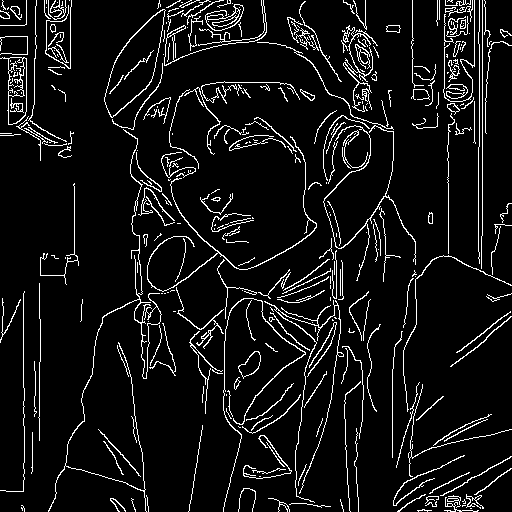

In [ ]:
canny_img = canny_edge(img)
canny_img

**Final Step: Generating Images**

In this final step, your task is to generate new images using the ControlNet model. This process involves using the detected edges from the previous steps as input to the ControlNet model and generating a new image as output.

You will be using the `pipe` function to generate the images. This function takes several parameters, including a prompt, the image with detected edges, a negative prompt, a generator, and the number of inference steps.

The prompt and negative prompt are used to guide the image generation process.
- The prompt should describe the desired output image.
- The negative prompt should describe what you want to avoid in the output image.

Make sure to choose **appropriate prompts** and don't hesitate to ask questions if you encounter any difficulties.

In [ ]:
# Put your code here:
prompt = ["oil painting of ikhsan person in new york during snow, city in the background", "digital painting of ikhsan person in the neon city, realistic, vivid, best quality, extremely detailed"] # @param {type:"string"}
neg_prompt = ["blurred, lowres, bad anatomy, ugly, worst quality, low quality, monochrome, signature"] * len(prompt) # @param {type:"string"}
imgs = None
# ---- End of your code ----

In [ ]:
seed = 777
generator = torch.Generator(device="cuda").manual_seed(seed)

imgs = pipe(
    prompt,
    canny_img,
    negative_prompt=neg_prompt,
    generator=generator,
    num_inference_steps=20,
)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
imgs.images

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

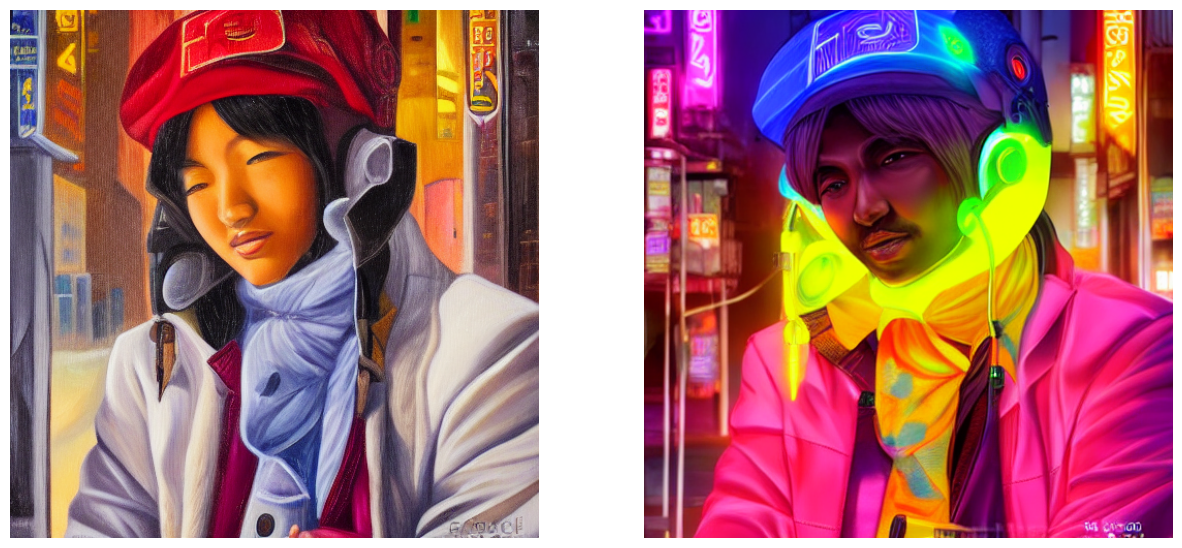

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def grid_img(images, rows, cols, scale=1.0):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * scale * 10, rows * scale * 10))
    axes = axes.flatten()

    for img, ax in zip(images, axes):
        ax.imshow(np.array(img))
        ax.axis("off")

    plt.show()

grid_img(imgs.images, 1, len(imgs.images), scale=0.75)


Saving the results

In [ ]:
!mkdir canny-edge-results

In [ ]:
for i, img in enumerate(imgs.images):
  img.save('canny-edge-results/result_{}.png'.format(i+1))

Submit the Result

In [ ]:
# Submit Method
image_model_question_id = "00_control_net_image_model"
submit_image(student_id, image_model_question_id, "C:/Users/SoulPerformPC/Downloads/result_2.png") # change '/content/fine-tuning-results/your-image-model.jpg' to the path of the image you want to upload

image_result_question_id = "01_control_net_image_result"
submit_image(student_id, image_result_question_id, "C:/Users/SoulPerformPC/Downloads/canny_edge_result_1.png") # change '/content/canny-edge-results/your-image-result.jpg' to the path of the image you want to upload

'Assignment successfully submitted'

### Part 2: ControlNet to Generate Image Using Pose

Welcome to the second part of your project assignment on Stable Diffusion with ControlNet. In this section, we will focus on using ControlNet to generate a new image based on the received pose of the input image. This process involves extracting the pose from an image and using it as an input to the ControlNet model.

This part of the project is divided into several steps, each designed to guide you through the process of image generation using ControlNet and pose extraction.

1. **Initialize Model, Extract Pose, and Visualize**: In this initial step, you will load the model that you will use to extract the pose from the image. Once you have loaded the model, you will use it to extract the pose from the image. **Use images from those generated from ControlNet with Canny Edge**. This pose will serve as the input for the ControlNet model.

2. **Loading the ControlNet Model**: After extracting the pose, you will load the ControlNet model. This is the model that you will use to generate the new image based on the extracted pose.

3. **Generating Images**: In the final step, you will use the ControlNet model and the extracted pose to generate a new image. This will allow you to see the practical application of the ControlNet model in image generation using pose extraction.

Remember, each step is crucial in understanding how ControlNet works with pose extraction. Take your time to understand each step and don't hesitate to ask questions if you encounter any difficulties. Good luck!

**Step 1: Initialize Model, Extract Pose, and Visualize**

In this first step, your task begins by creating a `grid_img` function to display images in a grid pattern. After that, you need to load the `lllyasviel/ControlNet` model using the `OpenposeDetector.from_pretrained` method and extract the pose from **the image obtained from the previous Canny Edge** run.

This step will prepare the model and input needed for the image creation process.

In [ ]:
# Put your code here:
from controlnet_aux import OpenposeDetector
pose_model = OpenposeDetector.from_pretrained('lllyasviel/ControlNet')

# ---- End of your code ----

body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

hand_pose_model.pth:   0%|          | 0.00/147M [00:00<?, ?B/s]

facenet.pth:   0%|          | 0.00/154M [00:00<?, ?B/s]

In [ ]:
img_pose = Image.open("/content/canny_edge_result_1.png")

<ipython-input-3-1e20c2f25389>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


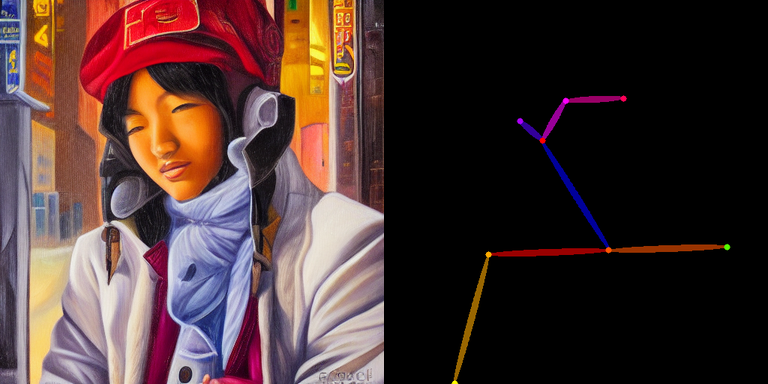

In [ ]:
pose = pose_model(img_pose)
grid_img([img_pose, pose], rows=1, cols=2, scale=0.75)

**Final Step: Loading the ControlNet Model and Generating Images**

In final step, your task is to **Load Model, Generate Images, and Visualize Output**.

Begin by loading the `thibaud/controlnet-sd21-openpose-diffusers` ControlNet model and initializing the `stabilityai/stable-diffusion-2-1-base` Stable Diffusion ControlNet Pipeline. Optimize the model's performance by enabling CPU offload, attention slicing, and memory-efficient attention.

Afterward, generate new images using the model and the extracted pose from the previous step. This process necessitates the creation of a function that accepts several parameters, including prompts, the extracted pose, a generator, and the number of inference steps.

Two types of prompts will guide the image generation:

- A positive prompt describing the desired outcome.
- A negative prompt defining elements you wish to avoid in the output image.

Ultimately, visualize your generated images using the `grid_img` function to assess the outcome of your image generation process.

Make sure to choose **appropriate prompts** and don't hesitate to ask questions if you encounter any difficulties.

In [ ]:
# Put your code here:
prompt = "profesional black and white pencil drawing of a young man in the park, casual sweater, nice detailed, sunset, side light" # @param {type:"string"}
neg_prompt = "ugly, tiling, closed eyes, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, bad anatomy, watermark, signature, cut off, low contrast, underexposed, overexposed, bad art, beginner, amateur, distorted face" # @param {type:"string"}
imgs = None
# ---- End of your code ----

In [ ]:
controlnet_pose_model = ControlNetModel.from_pretrained('thibaud/controlnet-sd21-openpose-diffusers', torch_dtype=torch.float16)
sd_controlpose = StableDiffusionControlNetPipeline.from_pretrained('stabilityai/stable-diffusion-2-1-base',
                                                                   controlnet=controlnet_pose_model,
                                                                   torch_dtype=torch.float16)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
sd_controlpose.enable_model_cpu_offload()
sd_controlpose.enable_attention_slicing()
sd_controlpose.enable_xformers_memory_efficient_attention()

In [ ]:
from diffusers import DEISMultistepScheduler

sd_controlpose.scheduler = DEISMultistepScheduler.from_config(sd_controlpose.scheduler.config)

  0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-3-1e20c2f25389>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


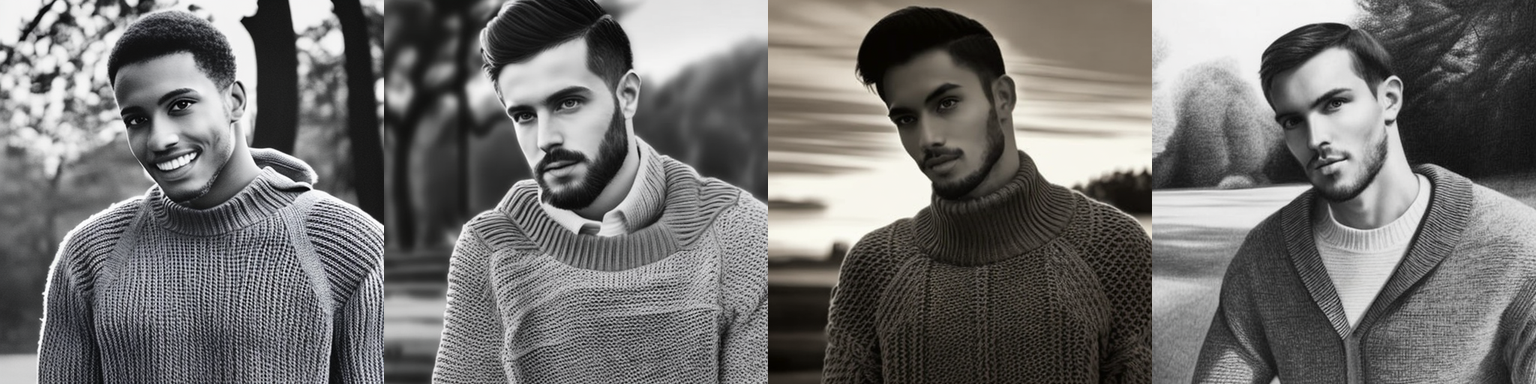

In [ ]:
seed = 555
generator = torch.Generator(device="cuda").manual_seed(seed)


imgs = sd_controlpose(
    prompt,
    pose,
    negative_prompt=neg_prompt,
    num_images_per_prompt=4,
    generator=generator,
    num_inference_steps=20,
)
grid_img(imgs.images, 1, 4, 0.75)

Saving the results

In [ ]:
!mkdir image-generator-results

In [ ]:
for i, img in enumerate(imgs.images):
  img.save('image-generator-results/result_{}.png'.format(i+1))

Submit the results

In [ ]:
# Submit Method
image_pose_question_id = "02_control_net_image_pose"
submit_image(student_id, image_pose_question_id, '/content/canny_edge_result_1.png') # change '/content/canny-edge-results/your-image-model.jpg' to the path of the image you want to upload

image_generator_question_id = "03_control_net_image_result"
submit_image(student_id, image_generator_question_id, '/content/image-generator-results/result_4.png') # change '/content/image-generator-results/your-image-result.jpg' to the path of the image you want to upload

'Assignment successfully submitted'

# Submit Notebook

In [ ]:
question_id = "00_stable_diffusion_notebook"
submit(student_id, name, assignment_id, "Notebook submission", question_id, drive_link)

'Assignment successfully submitted'